In [1]:
# http://www.procrasist.com/entry/2017/01/07/154441　参考

In [ ]:
# 流れとしては、(前提：Ubuntu環境配布済み)①ライブラリのインストール
# ②以下のコードの実行をやってもらう、
# を考えています。随時、口頭＋パワポ等でイメージ図を出して解説したいと思います。
# これだけだと40~60分位で終わりそうだと見積もっているので、
# それ以外のパートを要相談とさせてください。

In [23]:
from keras.datasets import mnist
from keras.utils import np_utils

In [24]:
(X_train, y_train),(X_test,y_test) = mnist.load_data()

In [25]:
X_train.shape

(60000, 28, 28)

In [26]:
y_train.shape

(60000,)

X_trainは入力のこと。28×28の画像が60000枚ある。<br>
y_trainは出力＝正解が収められたデータのこと。0〜9までが書かれた60000個の配列が入っている。<br>
※(60000,)　というのは、(60000,1)のこと

In [27]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ..., 
       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, 

In [28]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [29]:
X_train = X_train.reshape(60000,784).astype('float32')
X_test = X_test.reshape(10000,784).astype('float32')

※初回だけ時間がかかる。

In [30]:
#[0,255]の値を[0,1]に正規化
X_train /= 255.0
X_test /= 255.0

In [31]:
X_train 

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [32]:
X_train.shape

(60000, 784)

In [33]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [34]:
y_train

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

In [35]:
y_train.shape

(60000, 10)

y_trainは逆にデータのサイズが見かけ上大きくなった。<br>
これは例えば、
正解が4→[0,0,0,0,1,0,0,0,0,0]のように表示する必要があるため。<br>
データセットのお作法はフレームワーク間で異なる。

解説：0~1の範囲に正規化したこと、y_trainはKerasの出力ノードの形になったこと<br>
　　　図でbefore afterがほしい<br><br>
次はモデルを作成

In [36]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [37]:
model = Sequential()

In [38]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


入れ物だけ作られた状態

In [39]:
model.add(Dense(units=64, input_dim=784))
model.add(Activation("relu"))
model.add(Dense(units=10))
model.add(Activation("softmax"))

In [40]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                50240     
_________________________________________________________________
activation_5 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [41]:
from keras.optimizers import SGD

In [42]:
model.compile(loss="categorical_crossentropy", 
              optimizer=SGD(lr=0.01, momentum=0.9, nesterov=True),
              metrics=["accuracy"])

In [43]:
from keras.callbacks import ModelCheckpoint
check = ModelCheckpoint("model.hdf5")
history = model.fit(X_train, y_train, epochs=5, 
                    validation_split=0.2, batch_size=32,
                    callbacks=[check])

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 18s - loss: 0.3501 - acc: 0.8991 - val_loss: 0.2005 - val_acc: 0.9417
Epoch 2/5
48000/48000 [==============================] - 20s - loss: 0.1820 - acc: 0.9469 - val_loss: 0.1543 - val_acc: 0.9540
Epoch 3/5
48000/48000 [==============================] - 19s - loss: 0.1359 - acc: 0.9606 - val_loss: 0.1315 - val_acc: 0.9617
Epoch 4/5
48000/48000 [==============================] - 18s - loss: 0.1095 - acc: 0.9681 - val_loss: 0.1131 - val_acc: 0.9662
Epoch 5/5
48000/48000 [==============================] - 19s - loss: 0.0921 - acc: 0.9723 - val_loss: 0.1092 - val_acc: 0.9658


今行ったのが「学習」。次に行うのが「検査」。<br>
初めて入れるデータを用いて、今学習したネットワークがちゃんと育っていることを確認します。<br>
実はこのために、最初の段階で検査用のテストデータを用意していました。

In [46]:
X_test.shape

(10000, 784)

In [47]:
y_test.shape

(10000, 10)

10000枚の画像と、それに対応する10000枚の正解データが用意されていました。<br>
つまり、10000種類の画像で10000回の検査が行なえます。<br>
初めて入れる画像でも精度は出ているでしょうか。

In [49]:
loss_and_metrics = model.evaluate(X_test,y_test)
print("\nloss:{} accuracy:{}".format(loss_and_metrics[0],loss_and_metrics[1]))

 9728/10000 [============================>.] - ETA: 0s
loss:0.0994361451675 accuracy:0.9702


なかなか高いaccuracyになっていることがわかります。<br>
また、検査は一瞬で終わることもひとつの特徴です。

In [62]:
import matplotlib.pyplot as plt

In [63]:
def plot_history(history):
    # 精度の履歴をプロット
    plt.plot(history.history['acc'],"o-",label="accuracy")
    plt.plot(history.history['val_acc'],"o-",label="val_acc")
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(loc="lower right")
    plt.show()

    # 損失の履歴をプロット
    plt.plot(history.history['loss'],"o-",label="loss",)
    plt.plot(history.history['val_loss'],"o-",label="val_loss")
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(loc='lower right')
    plt.show()

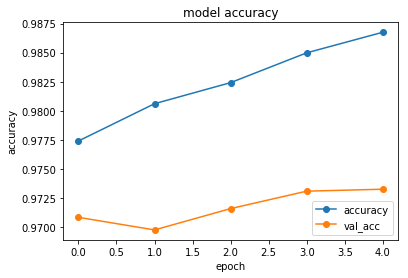

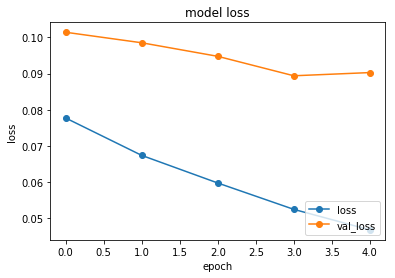

In [60]:
# modelに学習させた時の変化の様子をplot
plot_history(history)

完成！→一旦DLの流れをまとめる<br>
ここまでだいたい４０分くらいを想定、残り数十分でやるとしたら、<br>
・別のケースで試す(imdbとか？)<br>
・活性化関数をいろいろためす→あんまり面白くない？メッセージも特にない<br>
・TensorFlowを試す→少しだけならあり<br>
・パラメータをいじって変化を試してもらう